In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path=r'C:\Users\User\Project Covid'

In [3]:
#Importing merged data
df_merged_covid = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'covid_merged_datanew1.csv'))

In [5]:
df_merged_covid.head()

,Unnamed: 0,county_code,county_left,state,lat_left,long_left,male,female,median_age,female_percentage,covid_deaths,Population,covid_cases
0,1,1001.0,Autauga,Alabama,32.539527,-86.644082,26874,28326,37.8,51.315217,7588955,3745181060,462768132
1,768,1003.0,Baldwin,Alabama,30.727750,-87.722071,101188,106919,42.8,51.376936,7588955,3745181060,462768132
2,1562,1005.0,Barbour,Alabama,31.868263,-85.387129,13697,12085,39.9,46.873788,7588955,3745181060,462768132
3,2245,1007.0,Bibb,Alabama,32.996421,-87.125115,12152,10375,39.9,46.055844,7588955,3745181060,462768132
4,2948,1009.0,Blount,Alabama,33.982109,-86.567906,28434,29211,40.8,50.673953,7588955,3745181060,462768132


In [7]:
#Dropping 
df_merged_covid=df_merged_covid.drop(columns = ['Unnamed: 0'])

In [9]:
#Renaming column
df_merged_covid.rename(columns = {'county_left' : 'county','lat_left' : 'latitude','long_left' : 'longitude'}, inplace = True)

In [11]:
#pick out variables from your data set suitable for your exploratory visual analysis.
df_merged_covid_subset = df_merged_covid[['latitude', 'longitude', 'covid_cases', 'covid_deaths','male','female','median_age','Population','female_percentage']]

In [12]:
df_merged_covid_subset.corr()

,latitude,longitude,covid_cases,covid_deaths,male,female,median_age,Population,female_percentage
latitude,1.000000,-0.385449,-0.238055,-0.217354,-0.035346,-0.036675,0.121366,-0.252046,-0.139917
longitude,-0.385449,1.000000,-0.110019,-0.040293,-0.013443,-0.006395,0.072224,-0.091572,0.238694
covid_cases,-0.238055,-0.110019,1.000000,0.978037,0.207561,0.204181,-0.101317,0.989665,-0.080277
covid_deaths,-0.217354,-0.040293,0.978037,1.000000,0.199867,0.197839,-0.099779,0.967397,-0.075161
male,-0.035346,-0.013443,0.207561,0.199867,1.000000,0.999533,-0.176022,0.218829,0.102515
female,-0.036675,-0.006395,0.204181,0.197839,0.999533,1.000000,-0.174389,0.215406,0.110528
median_age,0.121366,0.072224,-0.101317,-0.099779,-0.176022,-0.174389,1.000000,-0.094732,0.034500
Population,-0.252046,-0.091572,0.989665,0.967397,0.218829,0.215406,-0.094732,1.000000,-0.079619
female_percentage,-0.139917,0.238694,-0.080277,-0.075161,0.102515,0.110528,0.034500,-0.079619,1.000000


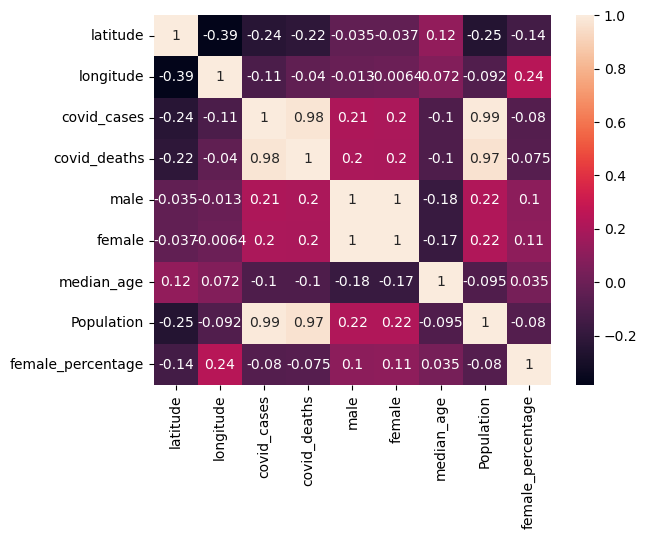

In [13]:
#Create a correlation matrix heatmap (colored)
corr = sns.heatmap(df_merged_covid_subset.corr(), annot = True)

Purple equates to 0, or no relationship between the variables, dark purple and black equate to negative correlations, and orange and light orange equate to positive correlations.Analysing population with death and cases it is showing strong positive correlation ie:it is showing 0.97 and 0.99 coefficient.The cases and deaths also show positive correlation ie 0.98.

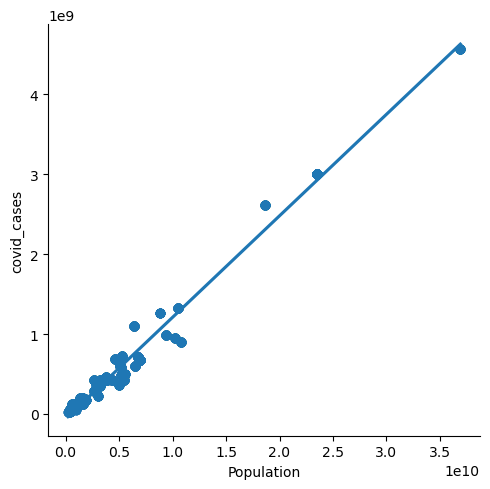

In [14]:
#Create a scatterplot (or plots) for the variables with the strongest correlations taking population and cases
scatterplot1=sns.lmplot(x = 'Population', y = 'covid_cases', data = df_merged_covid_subset)

The visualization shows a upward trend line which shows a positive relationship between population and cases-.The most of the data points are close to the line which gives a positive relationship.

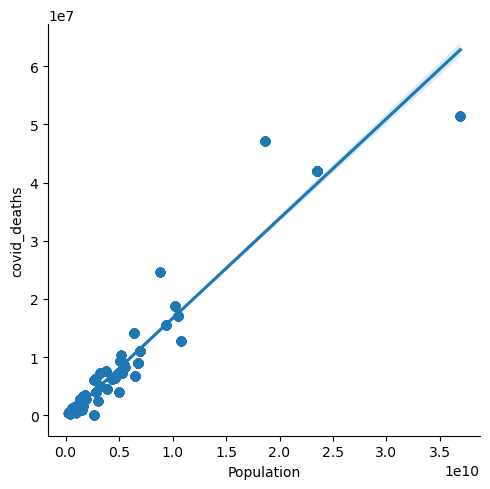

In [15]:
#Create a scatterplot (or plots) for the variables with the strongest correlations taking population and deaths
scatterplot2=sns.lmplot(x = 'Population', y = 'covid_deaths', data = df_merged_covid_subset)

The visualization shows a upward trend line which shows a positive relationship between population and deaths.The most of the data points are close to the line which gives a positive relationship

In [16]:
#create subset for pairplot
df_merged_covid_subset2 = df_merged_covid[['covid_cases', 'covid_deaths','Population']]

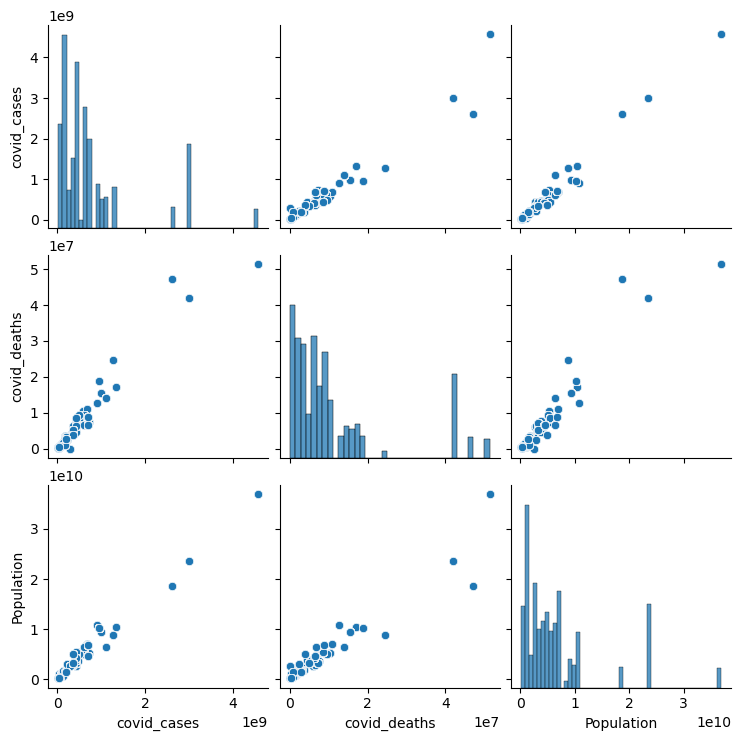

In [19]:
#Create pairplot
g = sns.pairplot(df_merged_covid_subset2)

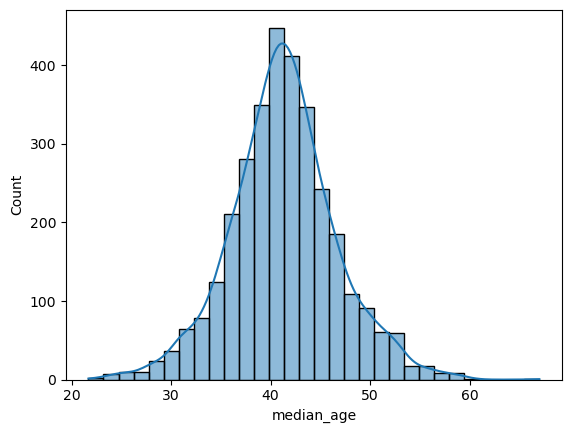

In [20]:
hist_median_age=sns.histplot(df_merged_covid ['median_age'], bins = 30,kde = True)

In [21]:
df_merged_covid.loc[df_merged_covid['median_age'] < 35, 'age category'] = 'young_aged'

In [22]:
df_merged_covid.loc[(df_merged_covid['median_age'] >= 35) & (df_merged_covid['median_age'] < 50), 'age category'] = 'Middle aged'

In [23]:
df_merged_covid.loc[df_merged_covid['median_age'] >= 50, 'age category'] = 'older_aged'

In [24]:
df_merged_covid['age category'].value_counts(dropna = False)

Middle aged    2687
young_aged      322
older_aged      195
Name: age category, dtype: int64

In [26]:
#create subset for categorical plot
df_merged_covid_subset3 = df_merged_covid[['median_age', 'covid_deaths','age category']]

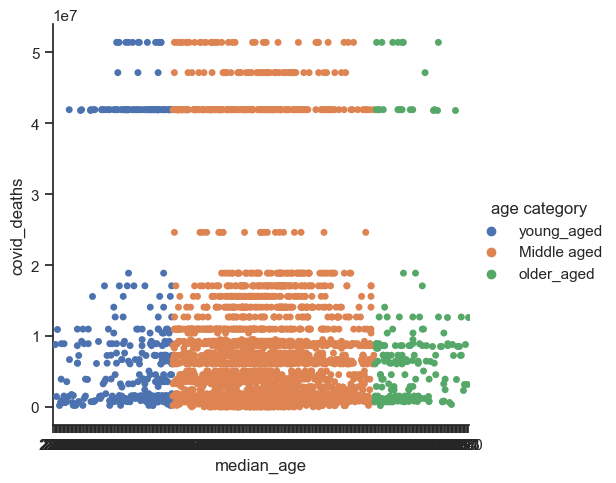

In [29]:
#categorical plot
sns.set(style = "ticks")
cat_1 = sns.catplot(x = 'median_age', y = 'covid_deaths', hue = 'age category', data =df_merged_covid_subset3)

Bandwidth of age category in dataset was limited especially for old aged people.Eventhough from the grapgh most of deaths due to covid is happenning with middle aged people.

In [30]:
corr.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'heatmap.png'))

In [31]:
cat_1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'categoricalplot_age_death.png'))

In [32]:
scatterplot1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_population_cases.png'))

In [33]:
scatterplot2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_population_deaths.png'))

In [34]:
g.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pairplot_popu_cases_deaths.png'))

In [35]:
hist_median_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_median_age.png'))